<a href="https://colab.research.google.com/github/dilaraozcerit/Data-Science/blob/main/DV_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [5]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [6]:
df.isnull().count()

timestamp       17414
cnt             17414
t1              17414
t2              17414
hum             17414
wind_speed      17414
weather_code    17414
is_holiday      17414
is_weekend      17414
season          17414
dtype: int64

In [7]:
df.duplicated().value_counts()      # By default, yinelenen her değer kümesi için ilk oluşum False olarak, diğerleri ise True olarak ayarlanır.
                                    # As it shows False for each rows, it means there is no repeating value.
                                    # For dropping the repeating values, please use >>> drop_duplicates 

False    17414
dtype: int64

In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


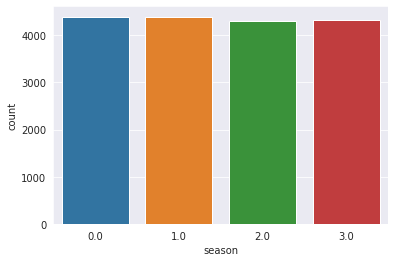

In [ ]:
sns.countplot(x = "season", data = df);

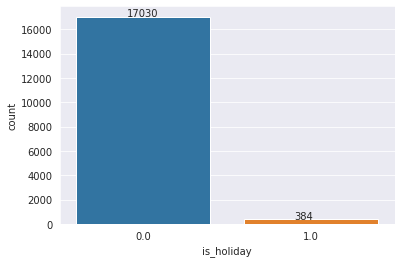

In [16]:
ax = sns.countplot(x = "is_holiday", data = df)

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.3, p.get_height()+20) );

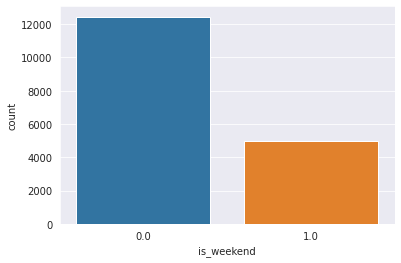

In [17]:
sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.3, p.get_height()+20) );

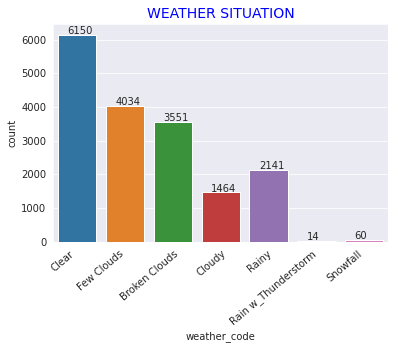

In [13]:
ax=sns.countplot("weather_code", data=df);
plt.title("WEATHER SITUATION", color = "blue", fontsize=14)
plt.xticks([-0.3,0.5,1.5,2.8,3.8,4.1,5.6],
           ['Clear', 'Few Clouds', 'Broken Clouds',"Cloudy", "Rainy", "Rain w_Thunderstorm", "Snowfall"],
          rotation=40)
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.2, p.get_height()+20) );

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [ ]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [19]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [20]:
df.set_index("timestamp", inplace = True)

In [21]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [22]:
df["year_month"] = df.index.strftime("%y-%m")
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["day_of_month"] = df.index.day
df["hour"] = df.index.hour


In [23]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_week,day_of_month,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,15-01,2015,1,6,4,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,4


In [ ]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
year_month       object
year              int64
month             int64
day_of_week       int64
day_of_month      int64
hour              int64
dtype: object

### 7.Visualize the correlation with a heatmap

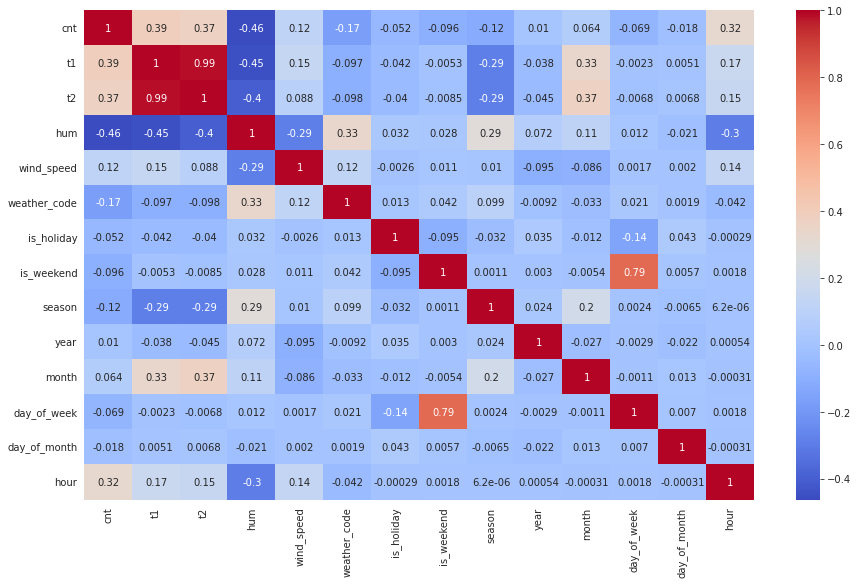

In [27]:
plt.figure(figsize = (15,9))
ax = sns.heatmap(data = df.corr(), annot = True, cmap = "coolwarm")

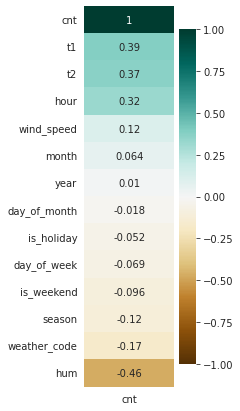

In [31]:
plt.figure(figsize=(2,7))
sns.heatmap(df.corr()[['cnt']].sort_values(by='cnt',ascending=False), cmap = 'BrBG',annot = True,vmin=-1);

### 8. Visualize the correlation of the target variable and the other features with barplot

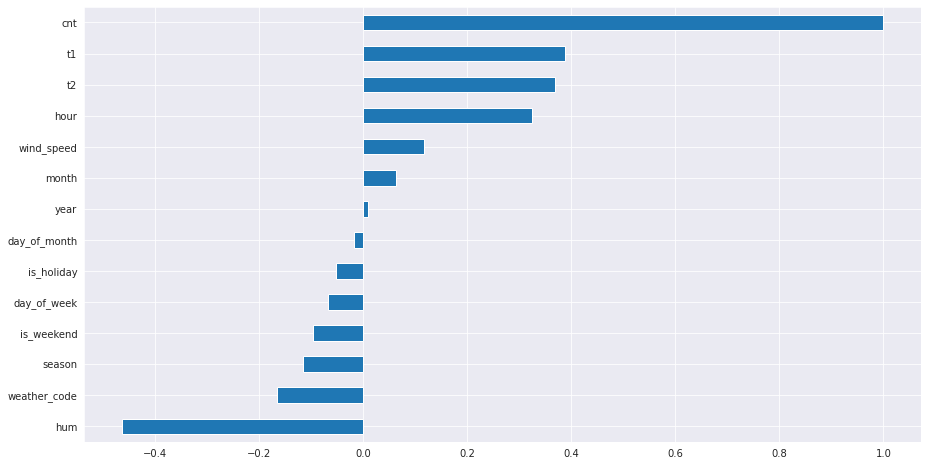

In [33]:
plt.figure(figsize = (15,8))
df.corr()["cnt"].sort_values().plot.barh();

### 9.Plot bike shares over time use lineplot

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_week,day_of_month,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,15-01,2015,1,6,4,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,4


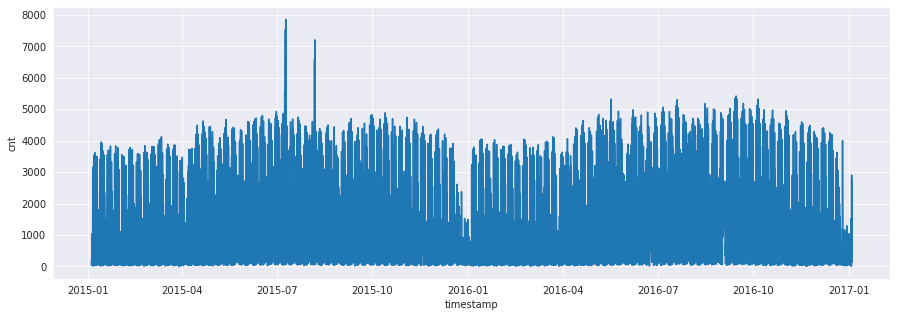

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y='cnt', data=df)
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_week,day_of_month,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,15-01,2015,1,6,4,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,4


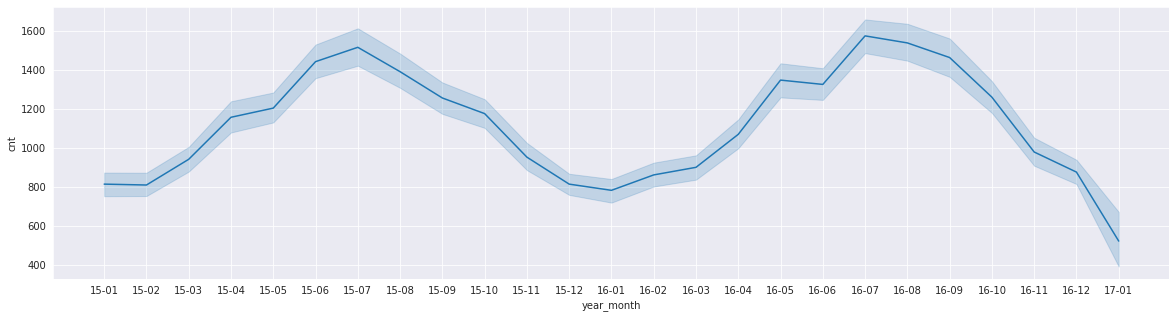

In [87]:
# with lineplot
plt.figure(figsize=(20,5))
sns.lineplot(x="year_month", y="cnt", data=df);

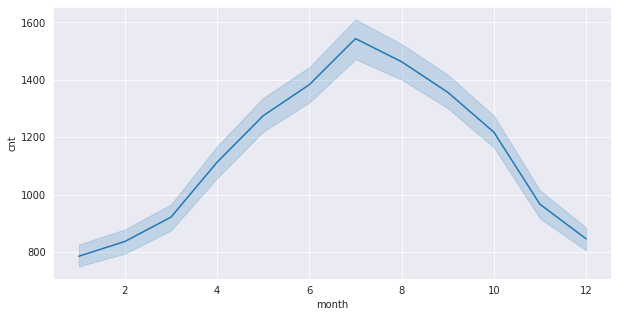

In [43]:
# with lineplot
plt.figure(figsize=(10,5))
sns.lineplot(x="month", y="cnt", data=df);

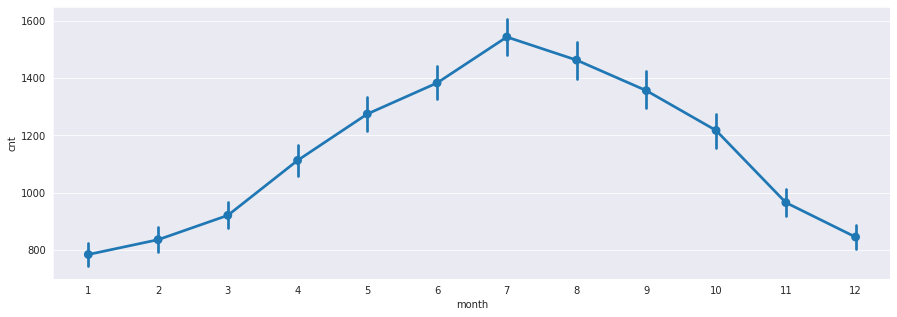

In [42]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x="month", y="cnt", data=df);

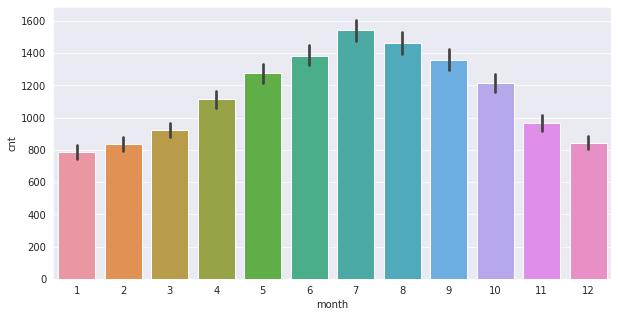

In [46]:
# with barplot
plt.figure(figsize=(10,5))
sns.barplot(x="month", y="cnt", data=df);

### 11.Plot bike shares by hours on (holidays, weekend, season)

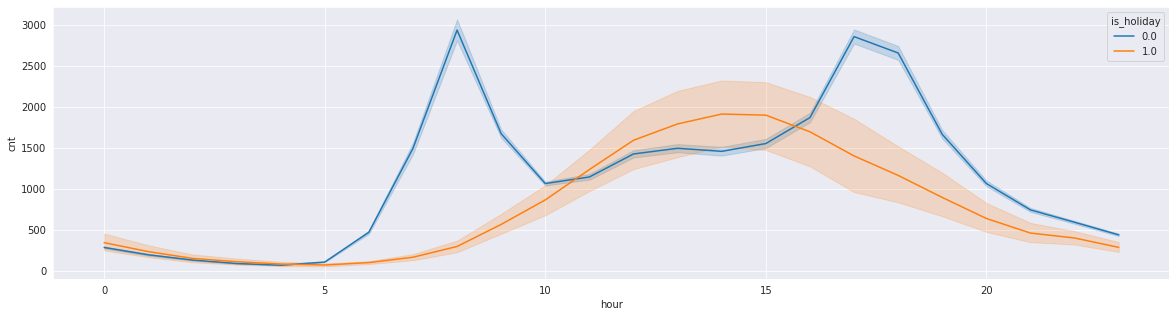

In [48]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(20,5))
sns.lineplot(x='hour', y='cnt', data=df, hue='is_holiday');

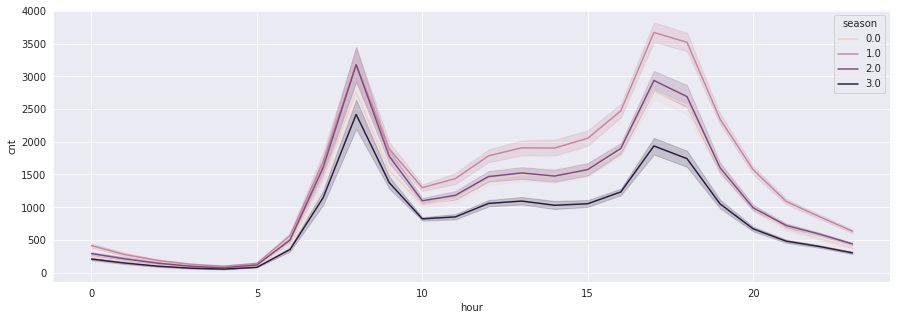

In [50]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15,5))
sns.lineplot(x='hour', y='cnt', data=df, hue='season');

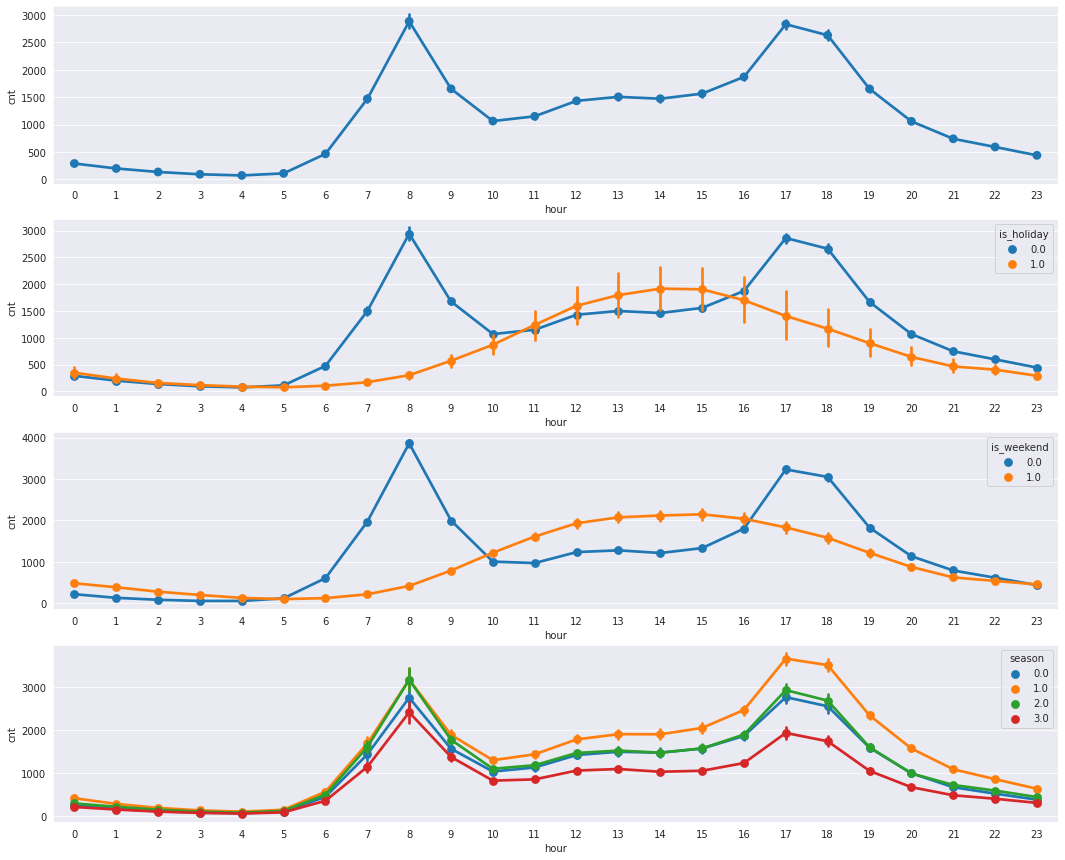

In [57]:
# with pointplot
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(18,15))
sns.pointplot(x='hour', y='cnt', data=df, ax = ax1);

sns.pointplot(x='hour', y='cnt', data=df, hue='is_holiday', ax= ax2)
sns.pointplot(x='hour', y='cnt', data=df, hue='is_weekend', ax= ax3)
sns.pointplot(x='hour', y='cnt', data=df, hue='season', ax= ax4);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

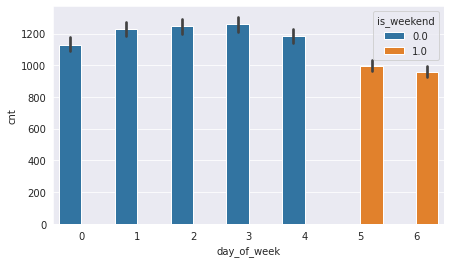

In [59]:
# with barplot

plt.figure(figsize=(7,4))

sns.barplot(x="day_of_week", y= "cnt", data=df, hue="is_weekend");

<Figure size 504x288 with 0 Axes>

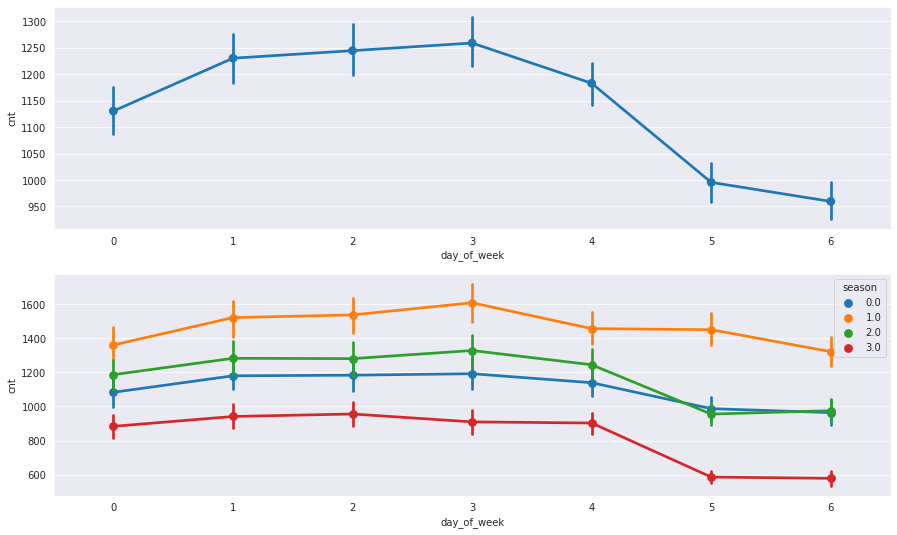

In [68]:
# with pointplot
plt.figure(figsize=(7,4))
fig,(ax1, ax2) = plt.subplots(nrows=2, figsize=(15,9))

sns.pointplot(x='day_of_week', y='cnt', data=df, ax = ax1);

sns.pointplot(x='day_of_week', y='cnt', data=df, hue='season', ax= ax2);

### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,1203,1166,1139,1123,1175,1140,1182,1178,1153,1115,1125,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


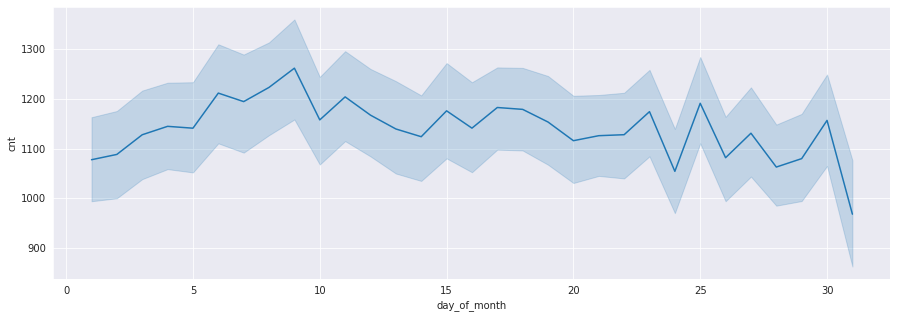

In [71]:
#with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x="day_of_month", y="cnt", data=df);

pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

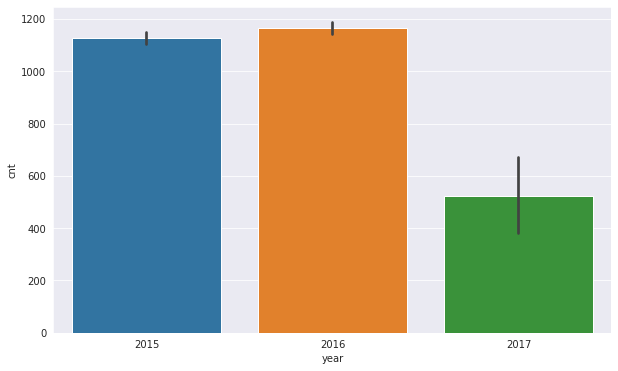

In [77]:
# with barplot
plt.figure(figsize=(10,6))

sns.barplot(x="year", y= "cnt", data=df);

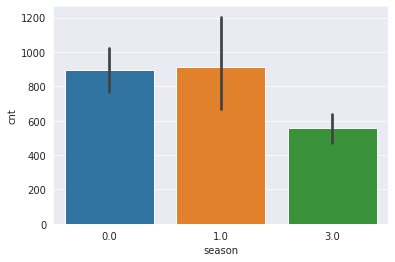

In [82]:
# with barplot
sns.barplot(x = "season", y = "cnt", data =df[df.is_holiday==1]);  

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_week,day_of_month,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,15-01,2015,1,6,4,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,15-01,2015,1,6,4,4


In [ ]:
w = df.is_weekend.value_counts()
w

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

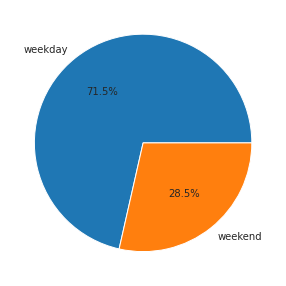

In [ ]:
# pie chart
myl = ["weekday", "weekend"]
plt.figure(figsize=(7, 5)) # büyülttük
plt.pie(w, labels=myl, autopct="%1.1f%%")
plt.show()

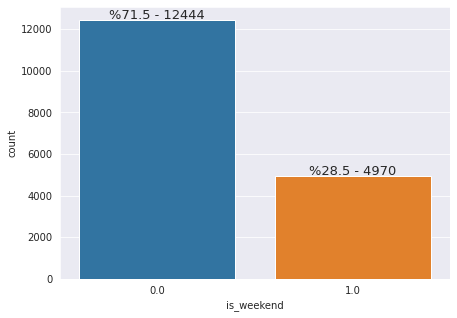

In [84]:
# with countplot
t = df.is_weekend.value_counts().sum()
g = df.is_weekend.value_counts()
plt.figure(figsize=(7,5))
sns.countplot(x=df.is_weekend)
for i in range(len(df.is_weekend.value_counts())):
    new = f'%{round((g[i]/t) * 100, 1)} - {g[i]}'
    plt.text(x=i, y=g[i] + 50, s = new, ha='center', size=13);

### 16.Plot the distribution of weather code by seasons

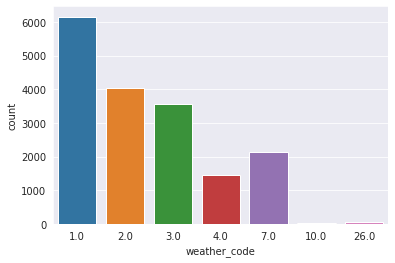

In [ ]:
# with countplot
sns.countplot(x = "weather_code", data = df);

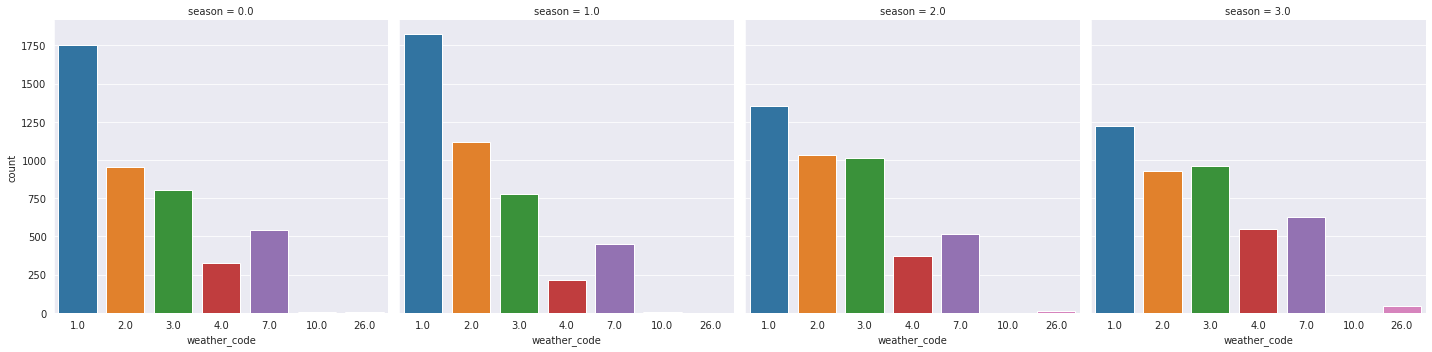

In [ ]:
# with catplot
sns.catplot(x = "weather_code", data = df, kind = "count", col = "season");

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

*Dilara Özcerit*